In [109]:
import os
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

sns.color_palette('deep')
sns.set_style('white')

LINEWIDTH = 1.5

workdir = os.getcwd()
pdf_path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)

In [110]:
# code for contents of plot

# filename = "training_results_com_2tran_LNAV_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"


def read_train_file(filename, limit=5500):
    # path = os.path.relpath('..\\..\\..\\results\\training_results\\complete_experiment_first', workdir)
    path = os.path.relpath('..\\..\\..\\results\\training_results', workdir)

    file = os.path.join(path, filename)

    print(file)

    data = []

    count = 0

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:
            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

            count += 1

            if count > limit:
                break

    return result

In [111]:
def single_reward_plot(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(data=result[0]['average reward'], linewidth=LINEWIDTH)
    running_avg = uniform_filter1d(result[0]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH)
    # axs.set_title(list(result_dict.keys())[0])

    axs.set(xlabel='Episode', ylabel='Reward')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [112]:
def single_sep_plot(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {"Conflicts": result[f]['conflicts'], "LoS": result[f]['LoS']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(data=data[0], linewidth=LINEWIDTH, ax=axs)
    running_avg = uniform_filter1d(data[0]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs, color="darkgrey")
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Count')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.045,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='center right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [113]:
def single_reward_val(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    # fig.suptitle("Validation " + filename, fontsize=24)

    sns.lineplot(data=result[0]['rewards'], linewidth=LINEWIDTH, ax=axs)
    lower = np.array(result[0]['rewards']) - np.array(result[0]['rewardsstd'])
    upper = np.array(result[0]['rewards']) + np.array(result[0]['rewardsstd'])
    axs.fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    # axs.set_title(list(result_dict.keys())[0])

    axs.set(xlabel='Episode', ylabel='Reward')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [114]:
def single_separation_val(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {'conflicts': result[f]['conflicts'], 'LoS': result[f]['LoS'], 'LoSstd': result[f]['LoSstd']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    # fig.suptitle("Validation " + filename, fontsize=24)

    sns.lineplot(x=range(0, len(data[0]['conflicts'])), y=data[0]['conflicts'], linewidth=LINEWIDTH, ax=axs)
    sns.lineplot(x=range(0, len(data[0]['LoS'])), y=data[0]['LoS'], linewidth=LINEWIDTH, ax=axs)
    lower = np.array(data[0]['LoS']) - np.array(data[0]['LoSstd'])
    upper = np.array(data[0]['LoS']) + np.array(data[0]['LoSstd'])
    axs.fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Count')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [115]:
def single_action_plot(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['action LEFT'], 'RIGHT': result[f]['action RIGHT'], 'LNAV': result[f]['action LNAV']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(data=actions[0], linewidth=LINEWIDTH)
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Count')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.035,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='upper right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()

In [116]:
def single_loss_plot(filename, result):
    loss_indices_dict = {}
    loss_data_dict = {}

    for f in list(result.keys()):
        loss_indices_dict[f] = [i for i, j in enumerate(result[f]['loss']) if j != ""]
        loss_data_dict[f] = [result[f]['loss'][x] for x in loss_indices_dict[f]]

    loss_indices = list(loss_indices_dict.values())
    loss_data = list(loss_data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(x=loss_indices[0][20:], y=loss_data[0][20:], linewidth=LINEWIDTH)
    running_avg = uniform_filter1d(loss_data[0][20:], 20)
    sns.lineplot(x=loss_indices[0][20:], y=running_avg, linewidth=LINEWIDTH)
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Loss')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()

..\..\..\results\training_results\training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
..\..\..\results\training_results\training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv


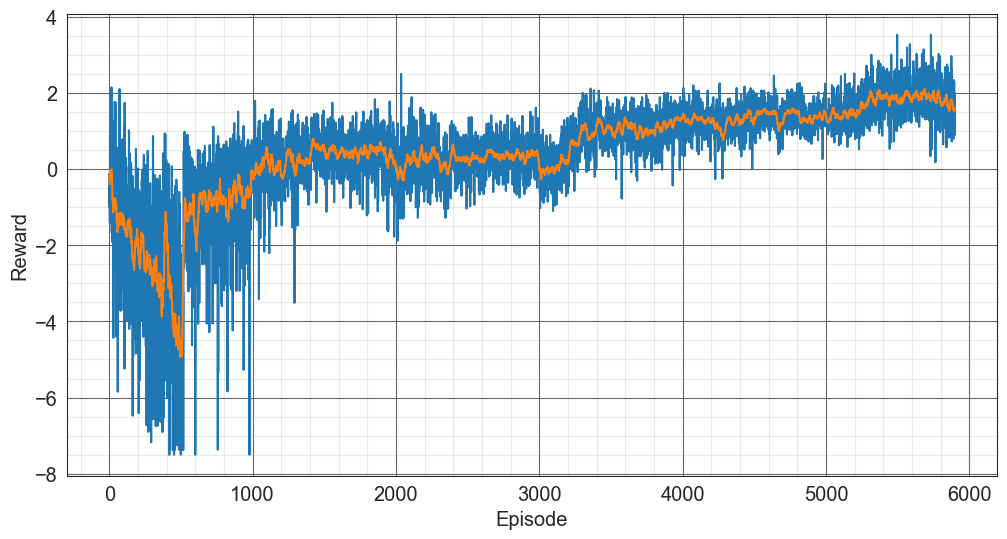

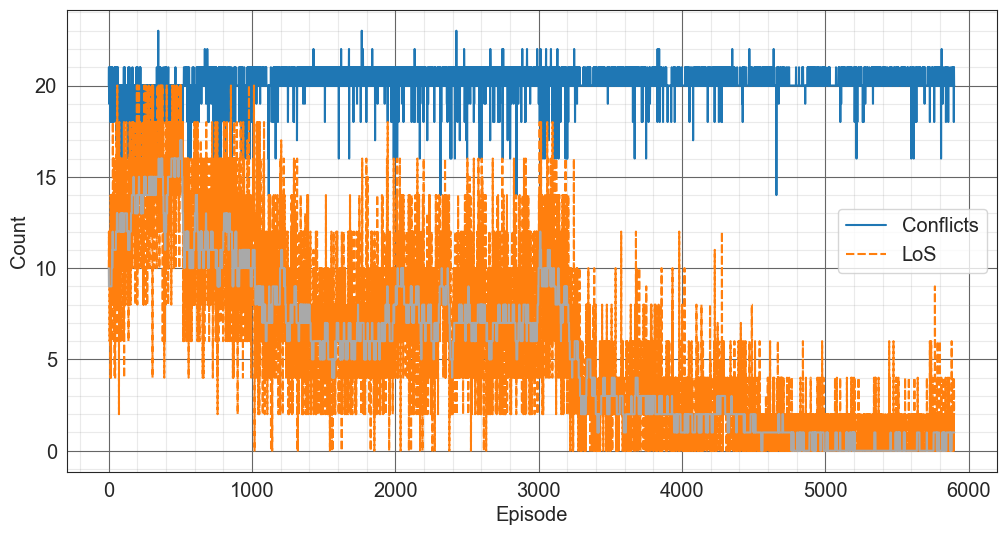

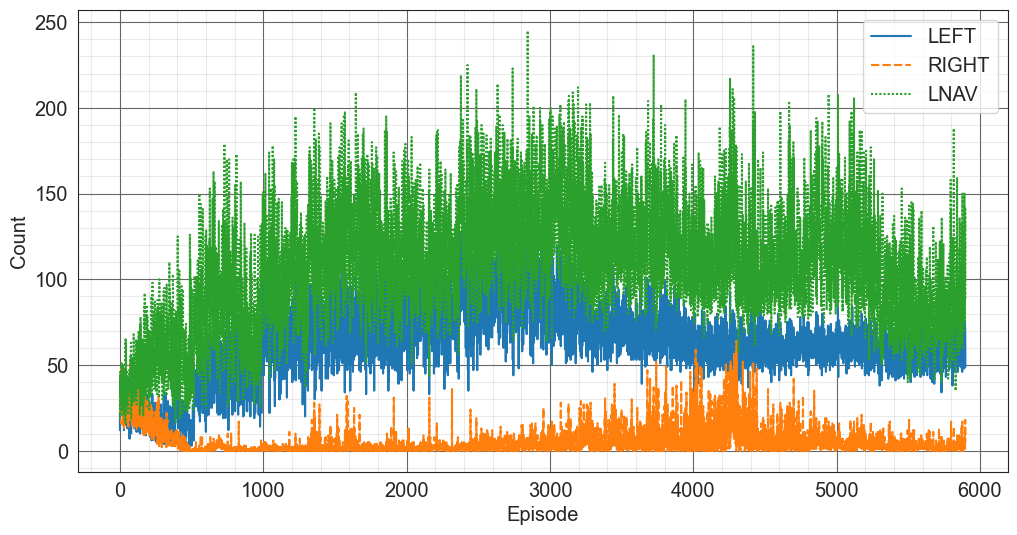

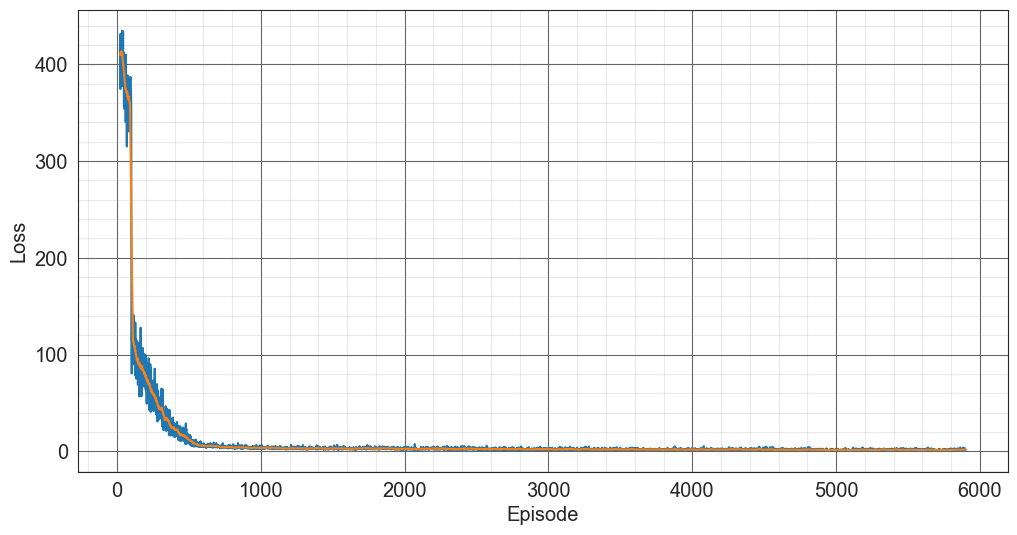

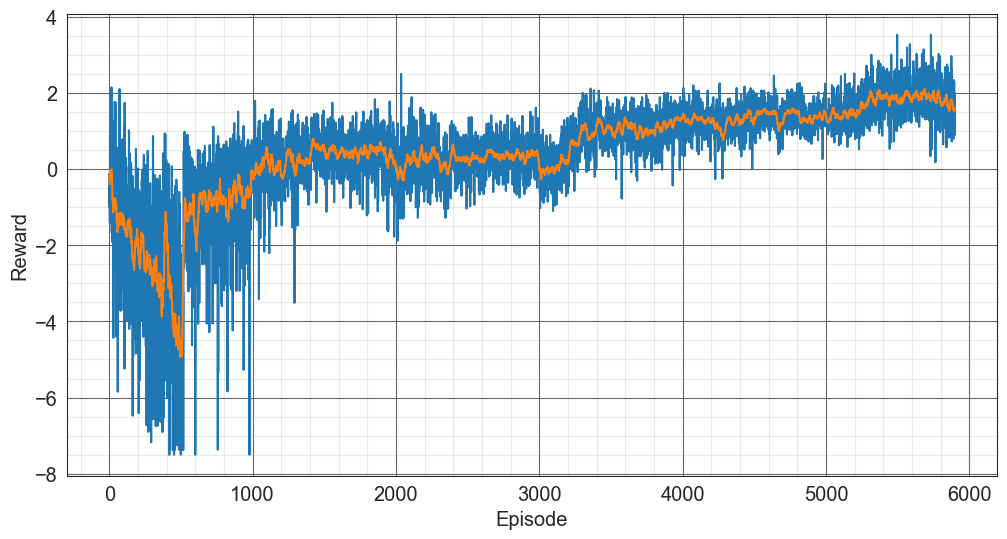

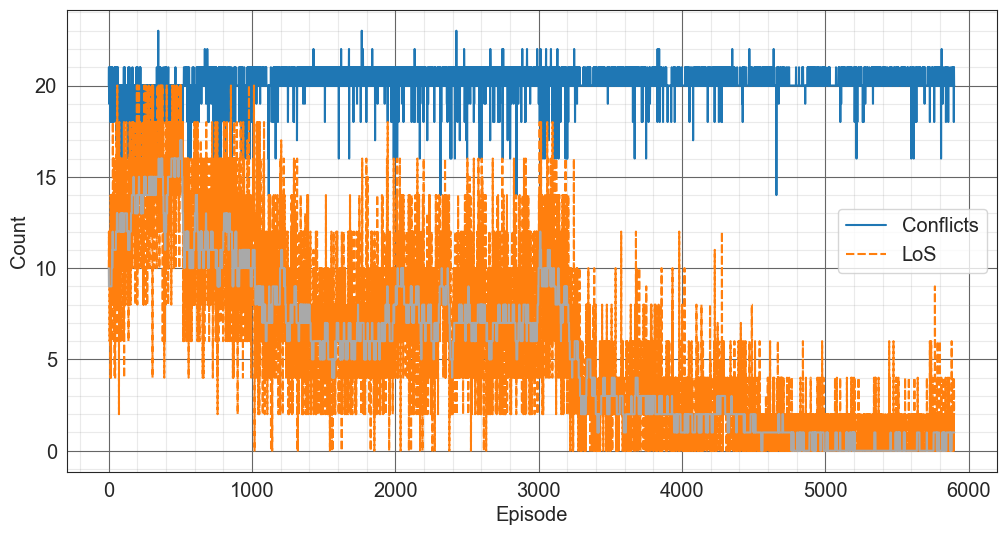

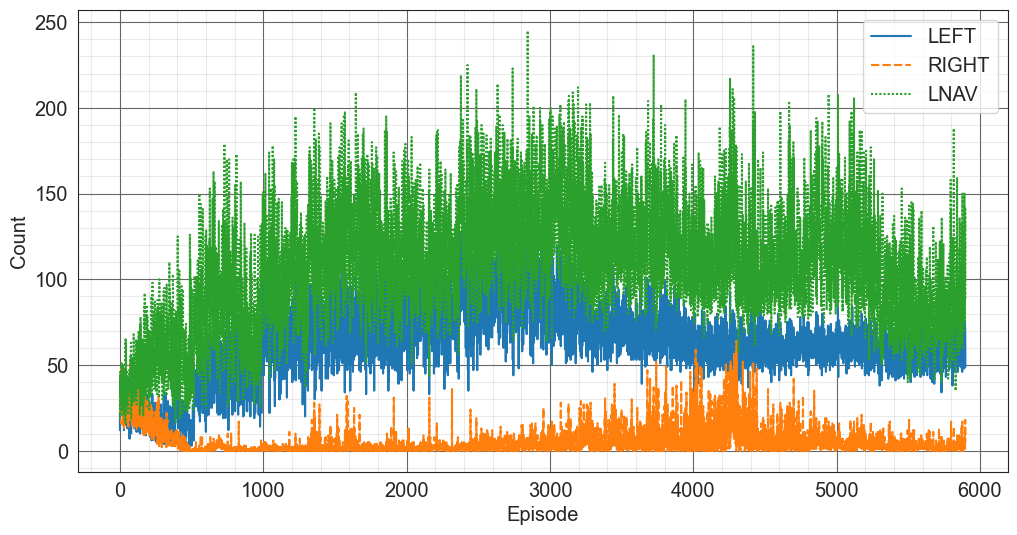

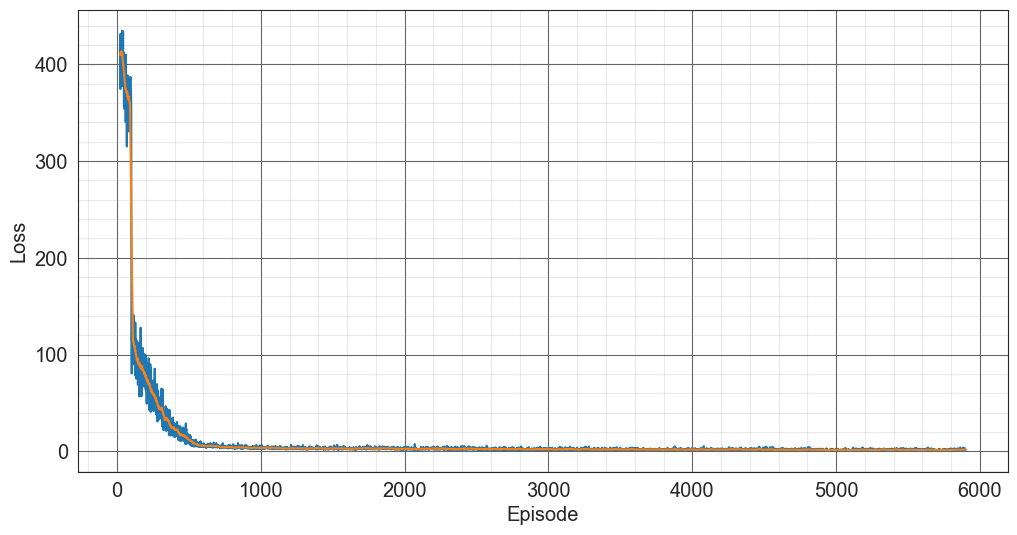

In [117]:
f_data = {}
f1_data = {}
# f2_data = {}

f = "training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"
f1 = "training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"
# f = "training_results_comLR_test_0_001.csv"
# f1 = "training_results_comLR_test_0_0001.csv"
# f2 = "training_results_comLR_test_1e-05.csv"

x = re.search("\d+batch", f).group()
y = re.search("\d+buffer", f).group()
name = x + " " + y

f_data[f] = read_train_file(f, 7500)
f1_data[f1] = read_train_file(f1, 7500)
# f2_data[f2] = read_train_file(f2, 7500)

single_reward_plot("Rewards for Two Transition Scenario with CPA Reward Function", f_data)
single_sep_plot("Conflicts vs LoS for Two Transition Scenario with CPA Reward Function", f_data)
single_action_plot("Action Distribution for Two Transition Scenario with CPA Reward Function", f_data)
single_loss_plot("Loss for Two Transition Scenario with CPA Reward Function", f_data)

single_reward_plot("Rewards for Three Transition Scenario with CPA Reward Function", f1_data)
single_sep_plot("Conflicts vs LoS for Three Transition Scenario with CPA Reward Function", f1_data)
single_action_plot("Action Distribution for Three Transition Scenario with CPA Reward Function", f1_data)
single_loss_plot("Loss for Three Transition Scenario with CPA Reward Function", f1_data)

# single_sep_plot("Separation Plot for Two Transition Scenario with CPA Reward Function", f1_data)
# single_reward_plot("128 batch test", f2_data)
# single_sep_plot("128 batch test", f2_data)
# single_reward_val("128 batch test", val_data)
# single_separation_val("128 batch test", val_data)